# 9.4

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from collections import Counter

# 计算基尼系数
def calc_gini(leaf):
    types = leaf[:,2]
    c = Counter(types)
    p1 = c[0]/types.size
    p2 = c[1]/types.size
    p3 = c[2]/types.size
    return 1 - (p1**2+p2**2+p3**2)

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data[:, [1,2]]  # 选择“花萼宽度”和“花瓣长度”作为特征
y = iris.target

# 将 X, y 拼成 flower 数据集，并且根据“花萼宽度”升序排列
flowers = np.c_[X,y]
flowers = flowers[np.argsort(flowers[:,0])]

#取出第一列，即“花萼宽度”，并去重
Sepals = np.unique(flowers[:,0])
#获得所有划分点
divisions = np.array([])
for i in range(Sepals.size-1) :
    wide = (Sepals[i] + Sepals[i+1])/2
    divisions = np.append(divisions, wide)

# 初始化
lowest_gini = 100
best_divide = 100

# 对划分点进行迭代
for div in divisions:
	# 通过划分点将数据分为左右两部分
    rule =  flowers[:,0] <= div
    left = flowers[rule == 0]
    right = flowers[rule == 1]

    # 计算该划分的加权基尼系数
    total_len = flowers.shape[0]
    left_gini = calc_gini(left)
    right_gini = calc_gini(right)
    gini = (left.shape[0]/total_len)*left_gini + (right.shape[0]/total_len)*right_gini
    if gini < lowest_gini:
        lowest_gini = gini
        best_divide = div

print('花萼宽度的最佳划分点 = {:.2f}, 对应的加权基尼系数 = {:.2f}'.format(best_divide, lowest_gini))

花萼宽度的最佳划分点 = 3.35, 对应的加权基尼系数 = 0.54


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from collections import Counter

# 计算基尼系数
def calc_gini(leaf):
    types = leaf[:,2]
    c = Counter(types)
    p1 = c[0]/types.size
    p2 = c[1]/types.size
    p3 = c[2]/types.size
    return 1 - (p1**2+p2**2+p3**2)

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data[:, [1,2]]  # 选择“花萼宽度”和“花瓣长度”作为特征
y = iris.target

# 将 X, y 拼成 flower 数据集，并且根据“花瓣长度”升序排列
flowers = np.c_[X,y]
flowers = flowers[np.argsort(flowers[:,1])]

#取出第二列，即“花瓣长度”，并去重
Sepals = np.unique(flowers[:,1])
#获得所有划分点
divisions = np.array([])
for i in range(Sepals.size-1) :
    wide = (Sepals[i] + Sepals[i+1])/2
    divisions = np.append(divisions, wide)

# 初始化
lowest_gini = 100
best_divide = 100

# 对划分点进行迭代
for div in divisions:
	# 通过划分点将数据分为左右两部分
    rule =  flowers[:,1] <= div
    left = flowers[rule == 0]
    right = flowers[rule == 1]

    # 计算该划分的加权基尼系数
    total_len = flowers.shape[0]
    left_gini = calc_gini(left)
    right_gini = calc_gini(right)
    gini = (left.shape[0]/total_len)*left_gini + (right.shape[0]/total_len)*right_gini
    if gini < lowest_gini:
        lowest_gini = gini
        best_divide = div

print('花瓣长度的最佳划分点 = {:.2f}, 对应的加权基尼系数 = {:.2f}'.format(best_divide, lowest_gini))

花瓣长度的最佳划分点 = 2.45, 对应的加权基尼系数 = 0.33


# 9.6

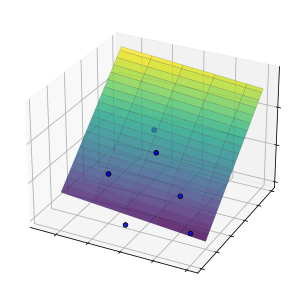

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 贷款数据集
X = np.insert(np.array([[10, 15], [11, 40], [12, 20], [9, 30], [13, 10], [8, 25],]), 0, 1, axis=1)	# 给每个xi第一列增加1
y = np.array([14, 30, 18, 26, 11, 22])

pinvX = np.linalg.pinv(X)   # 计算伪逆
w = pinvX @ y               # 最小二乘法的矩阵算法

# 回归平面的方程
def z(x, y):
   return w[0]+w[1]*x+w[2]*y

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置figure
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set_xticklabels([]), ax.set_yticklabels([]), ax.set_zticklabels([])
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# 绘制数据点
ax.scatter(X[:, 1], X[: 2], y, color='blue', edgecolors='k', marker = "o", zorder=10)
# 绘制回归平面
xtmp, ytmp = np.arange(5, 15, 1), np.arange(10, 50, 1)
xx, yy = np.meshgrid(xtmp, ytmp)
ax.plot_surface(xx, yy, z(xx,yy), cmap = 'viridis',  rstride=2, cstride=2, edgecolor='k', alpha=0.8, linewidth=0.1)
ax.view_init(28, -63)

plt.show()